# Convert keras model to .tflite file for mobile devices

Author: Anh Trung Tra   
Email: tratrunganh001@gmail.com

**Environment**:
- Ubuntu 16.04
- Python3.5
- TensorFlow 2.0

**Ref**:
https://www.tensorflow.org

**TODO:**  
[X] Load retrained keras model from .h5 file.        
[X] Convert keras model to .tflite file.      
[X] Test tf lite model.

Updated by: Le Trung Phong - letrungphong95@gmail.com

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print(tf.__version__)

keras = tf.keras
%matplotlib inline

2.0.0-alpha0


# Load retrained keras model from .h5 file

In [1]:
model = tf.keras.models.load_model('experiments/VGG16_based_classification/vgg16_catdog.h5')
model.summary()

NameError: name 'tf' is not defined

# Convert keras model to .tflite file
Ref: [*]https://www.tensorflow.org/lite/convert
<img src="img/tflite_1.png" style="height:400px;width:800px">
<pre>                            Fig1: Convert model to .tflite with tensorflow ver 1 [*]</pre>
<img src="img/tflite_2.png" style="height:400px;width:800px">
<pre>                            Fig2: Convert model to .tflite with tensorflow ver 2 [*]</pre>

In [3]:
run_model = tf.function(lambda x: model(x))
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))
converter = tf.lite.TFLiteConverter.from_concrete_function(concrete_func)
tflite_model = converter.convert()
open("experiments/VGG16_based_classification/vgg16_catdog.tflite", "wb").write(tflite_model)

121148080

# Test tf lite model 

In [2]:
# Load .tflite model
interpreter = tf.lite.Interpreter(model_path='experiments/VGG16_based_classification/vgg16_catdog.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def preprocess_image(path, size):
    """
    This function preprocess test image for prediction
    Arguments:
    -path: 
    -size:
    Returns:
    
    """
    # Read image from image path
    image_decoded = mpimg.imread(path)
    image = tf.image.convert_image_dtype(image_decoded, tf.float32) # convert to float values in [0, 1]
    # resize image to fit the input size
    resized_image = tf.image.resize_with_pad(image, size, size)
    # Scale to [0,255]
    resized_image = resized_image*255
    # Transpote from RGB to BGR then subtract for mean(imagenet)
    resized_image = resized_image[...,::-1] - [103.939,116.779,123.68]
    # Reshape tensor
    resized_image = tf.reshape(resized_image,[1,224,224,3])
    return resized_image


NameError: name 'tf' is not defined

Predict:  Dog
Confidence:  0.99999976


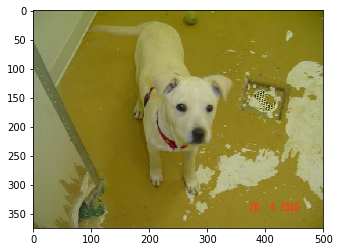

In [72]:
label = ['Cat','Dog']
test_path = 'data/PetImages/Dog/12153.jpg'
# Read image to array (height,weight,3)
raw_image = mpimg.imread(test_path)
# Preprocess image 
test_image = preprocess_image(path=test_path, size=224)
# Run model with test_image as input image
interpreter.set_tensor(input_details[0]['index'],test_image)
interpreter.invoke()
# Predict 
result = interpreter.get_tensor(output_details[0]['index'])
print('Predict: ',label[result.argmax()])
print('Confidence: ',result.max())
plt.imshow(raw_image)